# 데이터사이언스 기말과제
# 프리미어리그 선수 가치(몸값) 예상 모델
## 김도형 202055109

### 목적
### 축구선수들의 가치를 측정하는데 어떤 요인이 영향을 미치는지 궁금하고 직접 가치를 예측하는 모델을 만들어 보기 위함.

### 추측
### 1. 포지션별로 선수가치에 영향을 미치는 기준이 다를것이다.

# 1. 데이터셋 불러오기

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import math as math

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data2 = pd.read_csv("English Premier League Player Info (2019_2020) V2.csv", encoding='utf-8')
data2=data2[:514]

In [2]:
data2

,Full Name,Fifa Name,Player Name,Inherited Player ID,FIFA ID,Jersey Number,General Position,Specific Position,Club Name,Club Name (short),...,LeftWingBack_Value,LeftDefensiveMid_Value,CenterDefensiveMid_Value,RightDefensiveMid_Value,RightWingBack_Value,LeftBack_Value,LeftCenterBack_Value,CenterBack_Value,RightCenterBack_Value,RightBack_Value
0,Bernd Leno,B. Leno,Bernd Leno,2.0,192563.0,#1,Goalkeeper,Goalkeeper,Arsenal FC,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Héctor Bellerín Moruno,Héctor Bellerín,Héctor Bellerín,4.0,203747.0,#2,Defender,Right-Back,Arsenal FC,Arsenal,...,78+3,74+3,74+3,74+3,78+3,78+3,73+3,73+3,73+3,78+3
2,Kevin De Bruyne,K. de Bruyne,Kevin De Bruyne,273.0,192985.0,#17,Midfielder,Attacking Midfield,Manchester City,Man City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
3,Virgil van Dijk,V. van Dijk,Virgil van Dijk,246.0,203376.0,#4,Defender,Centre-Back,Liverpool FC,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
4,Sokratis,Sokratis,Sokratis,12.0,172879.0,#5,Defender,Centre-Back,Arsenal FC,Arsenal,...,71+3,72+3,72+3,72+3,71+3,74+3,82+3,82+3,82+3,74+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Ayotomiwa Dele-Bashiru,T. Dele-Bashiru,Tom Dele-Bashiru,770.0,233048.0,#24,Midfielder,Central Midfield,Watford FC,Watford,...,53+2,54+2,54+2,54+2,53+2,53+2,53+2,53+2,53+2,53+2
510,Steven Alzate,S. Alzate,Steven Alzate,655.0,236529.0,#46,Midfielder,Attacking Midfield,Brighton & Hove Albion,Brighton,...,49+2,47+2,47+2,47+2,49+2,47+2,41+2,41+2,41+2,47+2
511,Michel Vorm,M. Vorm,Michel Vorm,352.0,137677.0,#13,Goalkeeper,Goalkeeper,Tottenham Hotspur,Spurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,Andrew Lawrence Crofts,A. Crofts,Andrew Crofts,756.0,163570.0,#48,Midfielder,Central Midfield,Brighton & Hove Albion,Brighton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-1 데이터 분류

In [3]:
# 데이터를 보고 의미있는 컬럼을 뽑았다.
meaning_columns_list=['Fifa Name','General Position','Age','Potential','SkillMoves','Pace','Shooting','Passing','Dribbling','Defending','Physical',
     'Attacking_Crossing','Attacking_Finishing','Attacking_Heading_Accuracy','Attacking_Short_Passing',
      'Attacking_Volleys','_Dribbling','Curve','Long_Passing','Ball_Control','Acceleration','Sprint_Speed',
      'Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long_Shots','Aggression',
      'Interceptions','Positioning','Vision','Composure','Marking','Standing_Tackle','Sliding_Tackle',
       'Market Value (Euros)','FIFA Market Value',
       'FIFA Wage']
data2=data2[meaning_columns_list]

# 공격수, 수비수, 미드필더, 골키퍼별로 분류함.
data2_GK=data2[data2['General Position']=='Goalkeeper']
data2_DF=data2[data2['General Position']=='Defender ']
data2_MF=data2[data2['General Position']=='Midfielder ']
data2_FW=data2[data2['General Position']=='Forward ']

In [4]:
data2

,Fifa Name,General Position,Age,Potential,SkillMoves,Pace,Shooting,Passing,Dribbling,Defending,...,Interceptions,Positioning,Vision,Composure,Marking,Standing_Tackle,Sliding_Tackle,Market Value (Euros),FIFA Market Value,FIFA Wage
0,B. Leno,Goalkeeper,27.0,86.0,1.0,NaN,NaN,NaN,NaN,NaN,...,22.0,7.0,54.0,66.0,27.0,15.0,18.0,30000000.0,26000000.0,91000.0
1,Héctor Bellerín,Defender,24.0,85.0,3.0,92.0,51.0,70.0,78.0,76.0,...,78.0,67.0,66.0,70.0,75.0,78.0,80.0,40000000.0,17500000.0,69000.0
2,K. de Bruyne,Midfielder,28.0,91.0,4.0,76.0,86.0,92.0,86.0,61.0,...,61.0,88.0,94.0,91.0,68.0,58.0,51.0,130000000.0,90000000.0,370000.0
3,V. van Dijk,Defender,28.0,91.0,2.0,77.0,60.0,70.0,71.0,90.0,...,89.0,47.0,65.0,89.0,91.0,92.0,85.0,100000000.0,78000000.0,200000.0
4,Sokratis,Defender,31.0,84.0,2.0,72.0,51.0,52.0,60.0,84.0,...,76.0,49.0,45.0,81.0,85.0,86.0,86.0,20000000.0,23000000.0,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,T. Dele-Bashiru,Midfielder,20.0,76.0,2.0,63.0,49.0,53.0,60.0,51.0,...,51.0,57.0,54.0,49.0,52.0,53.0,49.0,150000.0,220000.0,5000.0
510,S. Alzate,Midfielder,21.0,68.0,3.0,66.0,50.0,54.0,61.0,35.0,...,43.0,59.0,55.0,62.0,24.0,42.0,37.0,NaN,160000.0,5000.0
511,M. Vorm,Goalkeeper,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,NaN
512,A. Crofts,Midfielder,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN,NaN


# 2. 분석을 위한 데이터 전처리

## 2-1 결측값 제거

In [5]:
# 공격수의 결측값 관찰
data2_FW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 6 to 499
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fifa Name                   125 non-null    object 
 1   General Position            125 non-null    object 
 2   Age                         125 non-null    float64
 3   Potential                   125 non-null    float64
 4   SkillMoves                  125 non-null    float64
 5   Pace                        125 non-null    float64
 6   Shooting                    125 non-null    float64
 7   Passing                     125 non-null    float64
 8   Dribbling                   125 non-null    float64
 9   Defending                   125 non-null    float64
 10  Physical                    125 non-null    float64
 11  Attacking_Crossing          125 non-null    float64
 12  Attacking_Finishing         125 non-null    float64
 13  Attacking_Heading_Accuracy  125 non

In [6]:
# 수비수의 결측값 관찰
data2_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 505
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fifa Name                   181 non-null    object 
 1   General Position            181 non-null    object 
 2   Age                         181 non-null    float64
 3   Potential                   181 non-null    float64
 4   SkillMoves                  181 non-null    float64
 5   Pace                        180 non-null    float64
 6   Shooting                    180 non-null    float64
 7   Passing                     180 non-null    float64
 8   Dribbling                   180 non-null    float64
 9   Defending                   180 non-null    float64
 10  Physical                    180 non-null    float64
 11  Attacking_Crossing          181 non-null    float64
 12  Attacking_Finishing         181 non-null    float64
 13  Attacking_Heading_Accuracy  181 non

In [7]:
# 미드필더의 결측값 관찰
data2_MF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 513
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fifa Name                   144 non-null    object 
 1   General Position            144 non-null    object 
 2   Age                         144 non-null    float64
 3   Potential                   142 non-null    float64
 4   SkillMoves                  142 non-null    float64
 5   Pace                        142 non-null    float64
 6   Shooting                    142 non-null    float64
 7   Passing                     142 non-null    float64
 8   Dribbling                   142 non-null    float64
 9   Defending                   142 non-null    float64
 10  Physical                    142 non-null    float64
 11  Attacking_Crossing          142 non-null    float64
 12  Attacking_Finishing         142 non-null    float64
 13  Attacking_Heading_Accuracy  142 non

###### FW는 결측값이 없고, GK는 결측값이 너무 많아서 제외하고 FW,DF,MF에 대해서 분석

In [8]:
# 결측값 제거
data2_DF=data2_DF.dropna(axis=0)
data2_MF=data2_MF.dropna(axis=0)

## 2-2 컬럼 이름 수정

In [9]:
# 컬럼이름바꾸기
data2_FW.rename(columns = {'Market Value (Euros)' : 'Market_Value'}, inplace = True)
data2_FW.rename(columns = {'FIFA Market Value' : 'FIFA_Market_Value'}, inplace = True)
data2_FW.rename(columns = {'FIFA Wage' : 'FIFA_Wage'}, inplace = True)
data2_FW.rename(columns = {'Shot Power' : 'Shot_Power'}, inplace = True)

data2_DF.rename(columns = {'Market Value (Euros)' : 'Market_Value'}, inplace = True)
data2_DF.rename(columns = {'FIFA Market Value' : 'FIFA_Market_Value'}, inplace = True)
data2_DF.rename(columns = {'FIFA Wage' : 'FIFA_Wage'}, inplace = True)
data2_DF.rename(columns = {'Shot Power' : 'Shot_Power'}, inplace = True)

data2_MF.rename(columns = {'Market Value (Euros)' : 'Market_Value'}, inplace = True)
data2_MF.rename(columns = {'FIFA Market Value' : 'FIFA_Market_Value'}, inplace = True)
data2_MF.rename(columns = {'FIFA Wage' : 'FIFA_Wage'}, inplace = True)
data2_MF.rename(columns = {'Shot Power' : 'Shot_Power'}, inplace = True)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 2-3 Market_Value, FIFA_Market_Value, FIFA_Wage에 대한 분석

###### 선수의 가치를 의미하는 	Market_Value, FIFA_Market_Value, FIFA_Wage의 상관관계가 높기 때문에 이 중 한개인  Market_Value만을 예상하는 모델을 만들것입니다.

In [10]:
# Market_Value, FIFA_Market_Value, FIFA_Wage간 상관관계
data2_FW.corr()[36:].T[36:]

,Market_Value,FIFA_Market_Value,FIFA_Wage
Market_Value,1.000000,0.937056,0.813534
FIFA_Market_Value,0.937056,1.000000,0.923199
FIFA_Wage,0.813534,0.923199,1.000000


In [11]:
# 본격적인 분석에 필요 없는 컬럼 제거
data2_FW=data2_FW.drop(['General Position','FIFA_Market_Value','FIFA_Wage'],axis=1)
data2_DF=data2_DF.drop(['General Position','FIFA_Market_Value','FIFA_Wage'],axis=1)
data2_MF=data2_MF.drop(['General Position','FIFA_Market_Value','FIFA_Wage'],axis=1)

#### 분석할 컬럼.
['Age', 'Potential', 'SkillMoves', 'Pace', 'Shooting',
       'Passing', 'Dribbling', 'Defending', 'Physical', 'Attacking_Crossing',
       'Attacking_Finishing', 'Attacking_Heading_Accuracy',
       'Attacking_Short_Passing', 'Attacking_Volleys', '_Dribbling', 'Curve',
       'Long_Passing', 'Ball_Control', 'Acceleration', 'Sprint_Speed',
       'Agility', 'Reactions', 'Balance', 'Shot_Power', 'Jumping', 'Stamina',
       'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle',
       'Market_Value']

# 3. 예측 모델 만들기

## 3-1 FW(공격수) Market_Value 선형예측모델

In [12]:
data2_FW

,Fifa Name,Age,Potential,SkillMoves,Pace,Shooting,Passing,Dribbling,Defending,Physical,...,Long_Shots,Aggression,Interceptions,Positioning,Vision,Composure,Marking,Standing_Tackle,Sliding_Tackle,Market_Value
6,M. Salah,27.0,90.0,4.0,93.0,86.0,81.0,89.0,45.0,74.0,...,84.0,63.0,55.0,92.0,84.0,91.0,38.0,43.0,41.0,150000000.0
9,H. Kane,26.0,91.0,3.0,70.0,91.0,79.0,81.0,47.0,83.0,...,86.0,78.0,35.0,93.0,81.0,91.0,56.0,36.0,38.0,150000000.0
13,A. Lacazette,28.0,86.0,4.0,82.0,85.0,75.0,86.0,40.0,74.0,...,78.0,72.0,42.0,87.0,78.0,86.0,29.0,42.0,30.0,70000000.0
14,P. Aubameyang,30.0,88.0,4.0,94.0,85.0,75.0,80.0,37.0,69.0,...,79.0,43.0,48.0,90.0,77.0,85.0,27.0,25.0,36.0,70000000.0
15,S. Agüero,31.0,89.0,4.0,80.0,90.0,77.0,88.0,33.0,74.0,...,84.0,65.0,24.0,93.0,83.0,90.0,30.0,29.0,24.0,65000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,G. Thomas,22.0,76.0,3.0,77.0,61.0,61.0,66.0,36.0,64.0,...,58.0,65.0,34.0,62.0,62.0,63.0,35.0,38.0,27.0,500000.0
491,K. Davis,21.0,76.0,3.0,69.0,59.0,51.0,68.0,41.0,73.0,...,55.0,68.0,44.0,68.0,59.0,52.0,44.0,34.0,23.0,2000000.0
492,J. Graham,24.0,69.0,4.0,77.0,58.0,61.0,70.0,27.0,47.0,...,56.0,43.0,23.0,57.0,62.0,60.0,33.0,23.0,24.0,500000.0
495,A. Connolly,19.0,79.0,2.0,70.0,64.0,40.0,60.0,20.0,57.0,...,55.0,50.0,16.0,65.0,47.0,55.0,12.0,18.0,15.0,2500000.0


### 3-1-1 모든 변수를 이용해 Market_Value를 예측하는 모델

In [13]:
# 모두를 변수로 하고 만든 모델
lm_model_FW_MV_all = smf.ols(formula = 'Market_Value ~ Age+Potential+ SkillMoves +Pace +Shooting+ Passing+Dribbling+Defending+Physical+Attacking_Crossing+Attacking_Finishing+Attacking_Heading_Accuracy+Attacking_Short_Passing+Attacking_Volleys+_Dribbling+Curve+Long_Passing+Ball_Control+Acceleration+Sprint_Speed+Agility+Reactions+Balance+Shot_Power+Jumping+Stamina+Strength+Long_Shots+Aggression+Interceptions+Positioning+Vision+Composure+Marking+Standing_Tackle+Sliding_Tackle' 
                             ,data=data2_FW).fit()
lm_model_FW_MV_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Market_Value   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     7.669
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           4.04e-15
Time:                        11:11:11   Log-Likelihood:                -2240.5
No. Observations:                 125   AIC:                             4555.
Df Residuals:                      88   BIC:                             4660.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -3.579e+08   5.95e+07     -6.011      0.000   -4.76e+08    -2.4e+08
Age                         9.366e+04   1.06e+06      0.089      0.930   -2.01e+06    2.19e+06
Potential                   2.585e+06   8.26e+05      3.130      0.002    9.44e+05    4.23e+06
SkillMoves                 -4.643e+06   4.59e+06     -1.011      0.315   -1.38e+07    4.49e+06
Pace                         2.35e+06   6.87e+06      0.342      0.733   -1.13e+07     1.6e+07
Shooting                    8.029e+05   3.83e+06      0.209      0.835   -6.82e+06    8.42e+06
Passing                     -6.89e+05   3.74e+06     -0.184      0.854   -8.12e+06    6.74e+06
Dribbling                   9.883e+05   6.06e+06      0.163      0.871   -1.11e+07     1.3e+07
Defending                  -1.401e+07   6.91e+06     -2.028      0.046   -2.77e+07   -2.81e+05
Physical                   -8.755e+06   6.76e+06     -1.294      0.199   -2.22e+07    4.69e+06
Attacking_Crossing          4.344e+05   8.91e+05      0.488      0.627   -1.34e+06     2.2e+06
Attacking_Finishing        -4.865e+05   1.94e+06     -0.250      0.803   -4.35e+06    3.38e+06
Attacking_Heading_Accuracy   1.54e+06   7.54e+05      2.041      0.044    4.05e+04    3.04e+06
Attacking_Short_Passing    -7.038e+05   1.54e+06     -0.458      0.648   -3.76e+06    2.35e+06
Attacking_Volleys          -1.898e+05   4.41e+05     -0.430      0.668   -1.07e+06    6.87e+05
_Dribbling                  1.932e+05   3.12e+06      0.062      0.951   -6.01e+06     6.4e+06
Curve                      -1.988e+05   4.36e+05     -0.456      0.650   -1.07e+06    6.68e+05
Long_Passing                4.373e+05   6.58e+05      0.664      0.508    -8.7e+05    1.74e+06
Ball_Control               -2.897e+05   2.02e+06     -0.144      0.886    -4.3e+06    3.72e+06
Acceleration               -1.226e+06   3.18e+06     -0.385      0.701   -7.55e+06     5.1e+06
Sprint_Speed                -1.02e+06   3.86e+06     -0.264      0.792   -8.69e+06    6.65e+06
Agility                    -2.086e+05   8.15e+05     -0.256      0.799   -1.83e+06    1.41e+06
Reactions                   1.619e+06   7.19e+05      2.252      0.027     1.9e+05    3.05e+06
Balance                     1.824e+05   4.45e+05      0.409      0.683   -7.03e+05    1.07e+06
Shot_Power                 -1.459e+06   8.81e+05     -1.655      0.101   -3.21e+06    2.93e+05
Jumping                     4.164e+05   4.11e+05      1.012      0.314   -4.01e+05    1.23e+06
Stamina                      2.73e+06   1.72e+06      1.584      0.117   -6.94e+05    6.15e+06
Strength                    4.791e+06   3.41e+06      1.407      0.163   -1.98e+06    1.16e+07
Long_Shots                  2.623e+05   8.54e+05      0.307      0.760   -1.44e+06    1.96e+06
Aggression                  1.489e+06   1.3

###### p값이 0.05보다 낮은 변수들이 너무 적다. 그래도 이 변수들로만으로 모델을 만들어봤다.

In [14]:
# 모든 변수를 이용한 모델에서 p값이 0.05보다 낮은 요인으로만 만든 모델
lm_FW_MV_P_value=smf.ols(formula= 'Market_Value ~ Potential+Defending+Attacking_Heading_Accuracy+Reactions+Sliding_Tackle'
          ,data=data2_FW).fit()
lm_FW_MV_P_value.aic.round(3)

4533.867

###### 위 모델의 aic의 값을 기억하고 다른 모델을 만들기

### 3-1-2 단일요인(독립변수)를 이용해 Market_Value을 잘 예측하는 모델 찾기. (AIC를 이용해 판단)

In [15]:
lm_model_FW_MV_1 = smf.ols(formula = 'Market_Value ~ Age' ,data=data2_FW).fit()
lm_model_FW_MV_2 = smf.ols(formula = 'Market_Value ~ Potential' ,data=data2_FW).fit()
lm_model_FW_MV_3 = smf.ols(formula = 'Market_Value ~ SkillMoves' ,data=data2_FW).fit()
lm_model_FW_MV_4 = smf.ols(formula = 'Market_Value ~ Pace' ,data=data2_FW).fit()
lm_model_FW_MV_5 = smf.ols(formula = 'Market_Value ~ Shooting' ,data=data2_FW).fit()
lm_model_FW_MV_6 = smf.ols(formula = 'Market_Value ~ Passing' ,data=data2_FW).fit()
lm_model_FW_MV_7 = smf.ols(formula = 'Market_Value ~ Dribbling' ,data=data2_FW).fit()
lm_model_FW_MV_8 = smf.ols(formula = 'Market_Value ~ Defending' ,data=data2_FW).fit()
lm_model_FW_MV_9 = smf.ols(formula = 'Market_Value ~ Physical' ,data=data2_FW).fit()
lm_model_FW_MV_10 = smf.ols(formula = 'Market_Value ~ Attacking_Crossing' ,data=data2_FW).fit()

lm_model_FW_MV_11 = smf.ols(formula = 'Market_Value ~ Attacking_Finishing' ,data=data2_FW).fit()
lm_model_FW_MV_12 = smf.ols(formula = 'Market_Value ~ Attacking_Heading_Accuracy' ,data=data2_FW).fit()
lm_model_FW_MV_13 = smf.ols(formula = 'Market_Value ~ Attacking_Short_Passing' ,data=data2_FW).fit()
lm_model_FW_MV_14 = smf.ols(formula = 'Market_Value ~ Attacking_Volleys' ,data=data2_FW).fit()
lm_model_FW_MV_15 = smf.ols(formula = 'Market_Value ~ _Dribbling' ,data=data2_FW).fit()
lm_model_FW_MV_16 = smf.ols(formula = 'Market_Value ~ Curve' ,data=data2_FW).fit()
lm_model_FW_MV_17 = smf.ols(formula = 'Market_Value ~ Long_Passing' ,data=data2_FW).fit()
lm_model_FW_MV_18 = smf.ols(formula = 'Market_Value ~ Ball_Control' ,data=data2_FW).fit()
lm_model_FW_MV_19 = smf.ols(formula = 'Market_Value ~ Acceleration' ,data=data2_FW).fit()
lm_model_FW_MV_20 = smf.ols(formula = 'Market_Value ~ Sprint_Speed' ,data=data2_FW).fit()

lm_model_FW_MV_21 = smf.ols(formula = 'Market_Value ~ Agility' ,data=data2_FW).fit()
lm_model_FW_MV_22 = smf.ols(formula = 'Market_Value ~ Reactions' ,data=data2_FW).fit()
lm_model_FW_MV_23 = smf.ols(formula = 'Market_Value ~ Balance' ,data=data2_FW).fit()
lm_model_FW_MV_24 = smf.ols(formula = 'Market_Value ~ Shot_Power' ,data=data2_FW).fit()
lm_model_FW_MV_25 = smf.ols(formula = 'Market_Value ~ Jumping' ,data=data2_FW).fit()
lm_model_FW_MV_26 = smf.ols(formula = 'Market_Value ~ Stamina' ,data=data2_FW).fit()
lm_model_FW_MV_27 = smf.ols(formula = 'Market_Value ~ Strength' ,data=data2_FW).fit()
lm_model_FW_MV_28 = smf.ols(formula = 'Market_Value ~ Long_Shots' ,data=data2_FW).fit()
lm_model_FW_MV_29 = smf.ols(formula = 'Market_Value ~ Aggression' ,data=data2_FW).fit()
lm_model_FW_MV_30 = smf.ols(formula = 'Market_Value ~ Interceptions' ,data=data2_FW).fit()

lm_model_FW_MV_31 = smf.ols(formula = 'Market_Value ~ Positioning' ,data=data2_FW).fit()
lm_model_FW_MV_32 = smf.ols(formula = 'Market_Value ~ Vision' ,data=data2_FW).fit()
lm_model_FW_MV_33 = smf.ols(formula = 'Market_Value ~ Composure' ,data=data2_FW).fit()
lm_model_FW_MV_34 = smf.ols(formula = 'Market_Value ~ Marking' ,data=data2_FW).fit()
lm_model_FW_MV_35 = smf.ols(formula = 'Market_Value ~ Standing_Tackle' ,data=data2_FW).fit()
lm_model_FW_MV_36 = smf.ols(formula = 'Market_Value ~ Sliding_Tackle' ,data=data2_FW).fit()

In [16]:
lm_model_FW_MV_AIC_list=[]

lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_1.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_2.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_3.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_4.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_5.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_6.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_7.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_8.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_9.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_10.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_11.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_12.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_13.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_14.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_15.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_16.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_17.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_18.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_19.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_20.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_21.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_22.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_23.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_24.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_25.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_26.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_27.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_28.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_29.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_30.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_31.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_32.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_33.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_34.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_35.aic.round(3))
lm_model_FW_MV_AIC_list.append(lm_model_FW_MV_36.aic.round(3))

lm_model_FW_MV_AIC_DataFrame=pd.DataFrame([lm_model_FW_MV_AIC_list],columns=list(data2_FW.columns[1:37]))

#### -AIC가 가장 낮은 상위 8개를 가장 낮은 AIC와의 차이를 그래프로 표현

###### - Potential - Reactions - Ball_Control - Dribbling - Positioning - Stamina  - Attacking_Short_Passing - Composure  순서로 AIC가 낮았다.

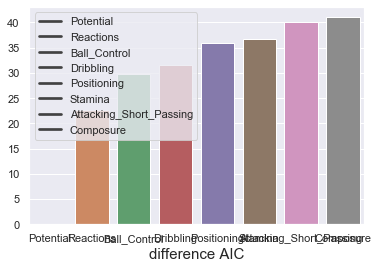

In [17]:
sns.set(font_scale=1)
sns.barplot(data=pd.DataFrame(lm_model_FW_MV_AIC_DataFrame.iloc[0].sort_values()[:8] - 
             lm_model_FW_MV_AIC_DataFrame.iloc[0].sort_values()[0]).T)
plt.xlabel("difference AIC",fontsize=15)
plt.legend(lm_model_FW_MV_AIC_DataFrame.iloc[0].sort_values()[:8].index)

### 3-1-3 여러개의 요인(독립변수)을 이용해 Market_Value을 잘 예측하는 모델 찾기. (단일변수를 사용한 모델에서 AIC가 작은순서대로 변수를 추가하여 판단.)

In [18]:
# 잠시 중간에 Type II ANOVA 할거임 그래서 모든 변수가 들어간 모델 만들었음.
sm.stats.anova_lm(lm_model_FW_MV_all, typ=2).round(3)['sum_sq'].sort_values( ascending=False)


Residual                      2.712209e+16
Potential                     3.019414e+15
Sliding_Tackle                1.932397e+15
Reactions                     1.563235e+15
Attacking_Heading_Accuracy    1.283826e+15
Defending                     1.267527e+15
Marking                       1.188396e+15
Interceptions                 1.117263e+15
Standing_Tackle               1.107471e+15
Shot_Power                    8.444530e+14
Stamina                       7.736532e+14
Strength                      6.100728e+14
Physical                      5.162123e+14
Positioning                   3.972933e+14
Aggression                    3.919265e+14
Jumping                       3.157747e+14
SkillMoves                    3.148919e+14
Composure                     2.823451e+14
Long_Passing                  1.360890e+14
Vision                        1.233991e+14
Attacking_Crossing            7.331682e+13
Attacking_Short_Passing       6.452063e+13
Curve                         6.404843e+13
Attacking_V

In [19]:
lm_model_FW_MV_2variable = smf.ols("Market_Value ~ Potential+Reactions", data2_FW).fit()
lm_model_FW_MV_2variable_aic=lm_model_FW_MV_2variable.aic.round(3)

lm_model_FW_MV_3variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control", data2_FW).fit()
lm_model_FW_MV_3variable_aic=lm_model_FW_MV_3variable.aic.round(3)

# 이게 공격수에서 Market_Value을 예측하는데 가장 효율적인 모델
lm_model_FW_MV_4variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling", data2_FW).fit()
lm_model_FW_MV_4variable_aic=lm_model_FW_MV_4variable.aic.round(3)

lm_model_FW_MV_5variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Positioning", data2_FW).fit()
lm_model_FW_MV_5variable_aic=lm_model_FW_MV_5variable.aic.round(3)

lm_model_FW_MV_6variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Positioning+Stamina"
                                   , data2_FW).fit()
lm_model_FW_MV_6variable_aic=lm_model_FW_MV_6variable.aic.round(3)

lm_model_FW_MV_7variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Positioning+Stamina+Attacking_Short_Passing"
                                   , data2_FW).fit()
lm_model_FW_MV_7variable_aic=lm_model_FW_MV_7variable.aic.round(3)


lm_model_FW_MV_8variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Positioning+Stamina+Attacking_Short_Passing+Composure"
                                   , data2_FW).fit()
lm_model_FW_MV_8variable_aic=lm_model_FW_MV_8variable.aic.round(3)

#### 여러개의 요인으로 만든 모델의 AIC값의 차이 그래프

In [20]:
lm_model_FW_MV_variable_AIC_list=[lm_model_FW_MV_2variable_aic,lm_model_FW_MV_3variable_aic,
                                  lm_model_FW_MV_4variable_aic,lm_model_FW_MV_5variable_aic,
                                 lm_model_FW_MV_6variable_aic,lm_model_FW_MV_7variable_aic,
                                 lm_model_FW_MV_8variable_aic]

lm_model_FW_MV_variable_AIC_DataFrame=pd.DataFrame([lm_model_FW_MV_variable_AIC_list],
                                                   columns=['2variable','3variable','4variable','5variable',
                                                           '6variable','7variable','8variable'])
lm_model_FW_MV_variable_AIC_DataFrame.T

,0
2variable,4530.623
3variable,4532.366
4variable,4527.059
5variable,4528.796
6variable,4527.599
7variable,4529.590
8variable,4530.098


Text(0.5, 0, 'difference variable AIC')

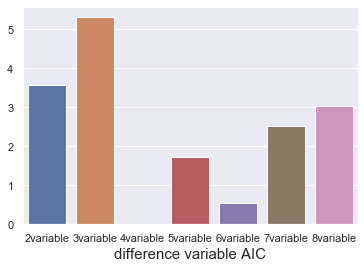

In [21]:
sns.set(font_scale=1)
sns.barplot(data=(lm_model_FW_MV_variable_AIC_DataFrame.T-
            lm_model_FW_MV_variable_AIC_DataFrame['4variable'][0]).T)
plt.xlabel("difference variable AIC",fontsize=15)

###### 그런데 단일변수로 했을때 AIC가 작은 순서로 변수를 추가하여 모델을 만들었는데 변수가 6개일때 AIC가 올라가야  정상인데 갑자기 내려갔다. 그래서 변수가 4개인 모델보다 더 좋은 모델이 있을거라고 판단! 

###### 변수가 5개에서 6개일때 추가된 요인이 'Stamina'이다. 그래서 변수가 4개인 모델에 'Stamina'요인을 추가하여 새롭게 변수가 5개인 모델을 다시 만들어 AIC를 측정해봄.

###### 참고로 모든 변수를 넣은 모델에서 p값이 0.05보다 작은 변수만 넣은 모델의 AIC값인 4533.867은 단일변수로 했을때 AIC가 작은 순서대로 넣어 변수가 4개인 모델보다 높았음.

### 3-1-4 변수를 수정한 새로운 모델

In [22]:
# 기존에 변수가 4개인 가장 좋은 모델이라고 생각한 모델의 AIC
lm_model_FW_MV_4variable_aic

4527.059

###### 더 좋을거라고 생각한 모델(Stamina가 추가된 모델)

In [23]:
lm_model_FW_MV_new_5variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Stamina", data2_FW).fit()
lm_model_FW_MV_new_5variable_aic=lm_model_FW_MV_new_5variable.aic.round(3)
lm_model_FW_MV_new_5variable_aic

4525.66

Text(0.5, 0, 'difference variable AIC')

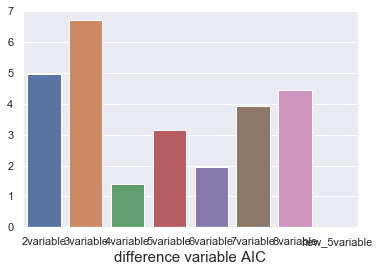

In [24]:
# Stamina가 추가된 모델의 AIC값을 포함한 그래프
lm_model_FW_MV_new_variable_AIC_list=[lm_model_FW_MV_2variable_aic,lm_model_FW_MV_3variable_aic,
                                  lm_model_FW_MV_4variable_aic,lm_model_FW_MV_5variable_aic,
                                 lm_model_FW_MV_6variable_aic,lm_model_FW_MV_7variable_aic,
                                 lm_model_FW_MV_8variable_aic,lm_model_FW_MV_new_5variable_aic]

lm_model_FW_MV_new_variable_AIC_DataFrame=pd.DataFrame([lm_model_FW_MV_new_variable_AIC_list],
                                                   columns=['2variable','3variable','4variable','5variable',
                                                           '6variable','7variable','8variable','new_5variable'])
sns.set(font_scale=1)
sns.barplot(data=(lm_model_FW_MV_new_variable_AIC_DataFrame.T-
            lm_model_FW_MV_new_variable_AIC_DataFrame['new_5variable'][0]).T)
plt.xlabel("difference variable AIC",fontsize=15)

###### *그래서  Potential + Reactions + Ball_Control + Dribbling + Stamina가 요인으로 추가된 모델이 가장 효율이 좋은 모델이다.

In [25]:
# 수정된 결정계수로의 분석
print("변수가 4개인 모델의 수정된 결정계수 :", end=' ')
print(lm_model_FW_MV_4variable.rsquared_adj)
print("변수가 5개인 새로운 성능 좋은 모델의 수정된 결정계수 :", end=' ')
print(lm_model_FW_MV_new_5variable.rsquared_adj)

변수가 4개인 모델의 수정된 결정계수 : 0.6669544452133926
변수가 5개인 새로운 성능 좋은 모델의 수정된 결정계수 : 0.673164215260615


###### 수정된 결정계수로 보았을 때도 Stamina가 추가된 모델이 결정계수도 높은 것으로 나타났다. (AIC도 낮고 결정계수도 높고 좋은 모델이다.)

###### 그런데 왜?  단일변수로 했을때 AIC가 낮은 순서로 변수를 넣었는데 그 순서를 무시하고 여러변수로 만든 모델이 Stamina가 추가되니 AIC가 낮아질까?

In [29]:
# Stamina와 다른 변수들의 상관관계
five_variable=['Potential', 'Reactions' ,'Ball_Control', 'Dribbling','Stamina']
data2_FW.corr()[five_variable].T[five_variable]['Stamina']

Potential       0.517250
Reactions       0.537980
Ball_Control    0.541301
Dribbling       0.596790
Stamina         1.000000
Name: Stamina, dtype: float64

###### 제일 성능이 좋은 모델의 변수5가지에서 Stamina와 나머지 4가지의 상관관계를 보면 그다지 상관관계가 없는 것을 알 수 있다. 그래서 상관관계가 없는 변수를 넣어 예측하니  성능이 좋아진 것

In [30]:
#Type II ANOVA 
sm.stats.anova_lm(lm_model_FW_MV_all, typ=2).round(3)['sum_sq'].sort_values( ascending=False)

Residual                      2.712209e+16
Potential                     3.019414e+15
Sliding_Tackle                1.932397e+15
Reactions                     1.563235e+15
Attacking_Heading_Accuracy    1.283826e+15
Defending                     1.267527e+15
Marking                       1.188396e+15
Interceptions                 1.117263e+15
Standing_Tackle               1.107471e+15
Shot_Power                    8.444530e+14
Stamina                       7.736532e+14
Strength                      6.100728e+14
Physical                      5.162123e+14
Positioning                   3.972933e+14
Aggression                    3.919265e+14
Jumping                       3.157747e+14
SkillMoves                    3.148919e+14
Composure                     2.823451e+14
Long_Passing                  1.360890e+14
Vision                        1.233991e+14
Attacking_Crossing            7.331682e+13
Attacking_Short_Passing       6.452063e+13
Curve                         6.404843e+13
Attacking_V

###### 이는 모든 변수를 넣은 모델의 변수별 잔차제곱합을 보여주는데 비슷한 맥락으로 여기서도 AIC순서가 아닌것으로 보아 변수간의 상관관계에 따라서 성능이 다를 수 있다는 것을 알 수 있다.

### 3-1-5 모델을 이용한 Market_Value의 예측값에 대한 관찰

In [31]:
data2_FW['Market_Value_predict']=lm_model_FW_MV_new_5variable.predict()

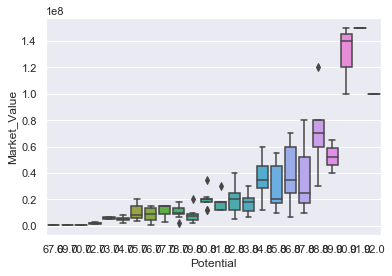

In [32]:
#Potential과 Market_Value와의 분포
sns.boxplot(x="Potential", y="Market_Value", data=data2_FW)

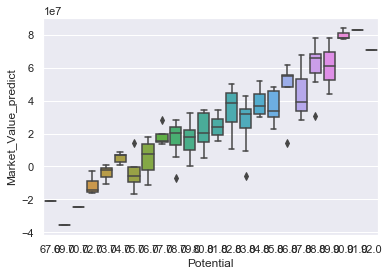

In [33]:
#Potential과 예측한 Market_Value와의 분포
sns.boxplot(x="Potential", y="Market_Value_predict", data=data2_FW)

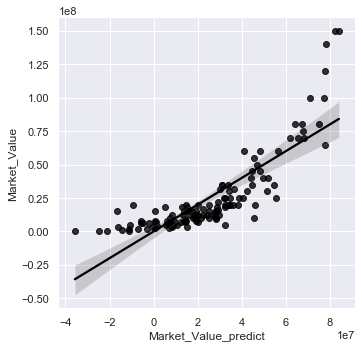

In [34]:
# Market_Value값과 예측값 사이의 관계를 보여주는 그래프
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_FW,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

###### 현재 모델은 급격히 Market_Value가 높아지는 값을 잘 예측 못하고, 음수의 값을 예측하고 있다.(몸값에는 음수가 없는데 말이다.) 또한 그 분포가 exp(지수함수)의 형태를 보임

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


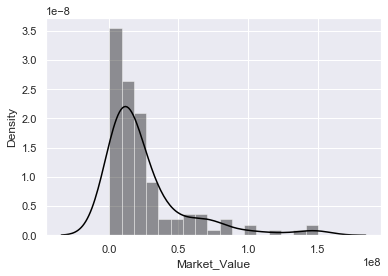

In [35]:
# Market_Value의 분포
sns.distplot(data2_FW['Market_Value'], color = 'black')

###### Market_Value가 작은 곳에 많은 데이터들이 몰려있음

###### Market_Value의 값이 음수가 없음, 예측값과 관측값의 분포가 지수함수꼴을 보임. 그래서 예측을 더 잘할 거 같은 푸아송 회귀모델을 적용시켜봄

## 3-2 FW(공격수) Market_Value 푸아송회귀모델

In [36]:
# 푸아송 회귀 모델
lm_model_FW_MV_new_5variable_pois = smf.glm("Market_Value ~ Potential+Reactions+Ball_Control+Dribbling+Stamina", data2_FW,
                                        family=sm.families.Poisson()).fit()
lm_model_FW_MV_new_5variable_pois_aic=lm_model_FW_MV_new_5variable_pois.aic.round(3)
lm_model_FW_MV_new_5variable_pois_aic

375462518.538

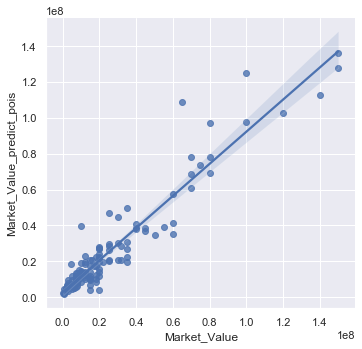

In [37]:
#푸아송 모델로 예측한 예측값의 분포
Market_Value_predict_pois=lm_model_FW_MV_new_5variable_pois.predict()
data2_FW['Market_Value_predict_pois']=Market_Value_predict_pois
sns.lmplot(x='Market_Value',y='Market_Value_predict_pois',data=data2_FW)

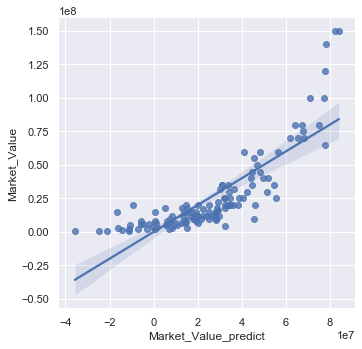

In [38]:
# 선형모델로 예측한 예측값의 분포
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_FW)

###### 확실히 푸아송분포를 이용한 것이 예측 더 잘되었다.(그래프 상으로)

In [39]:
# 선형모델과 푸아송모델의 잔차제곱의 합
data2_FW['Market_Value_predict_pois_resid']=data2_FW['Market_Value']-data2_FW['Market_Value_predict_pois']
np.sum(lm_model_FW_MV_new_5variable.resid**2)
np.sum(data2_FW['Market_Value_predict_pois_resid']**2)
print('선형모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(lm_model_FW_MV_new_5variable.resid**2))
print('푸아송 모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(data2_FW['Market_Value_predict_pois_resid']**2))

선형모델을 이용한 잔차제곱합 : 3.519624940421307e+16
푸아송 모델을 이용한 잔차제곱합 : 1.1113123348135038e+16


###### 푸아송 모델을 이용한 것이 잔차가 더 작다.

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


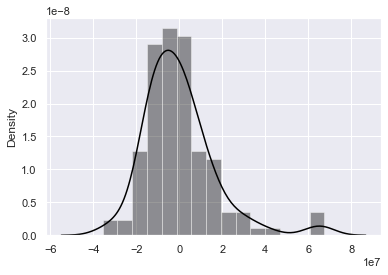

In [40]:
# 선형모델의 잔차
sns.distplot(lm_model_FW_MV_new_5variable.resid, color = 'black')

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


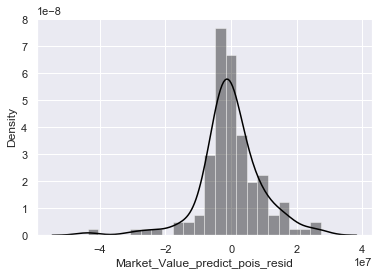

In [41]:
# 푸아송 모델의 잔차
sns.distplot(data2_FW['Market_Value_predict_pois_resid'], color = 'black')

###### 선형모델보다 푸아송모델을 이용한 것의 잔차가 더 정규분포에 가깝다.

---

## 3-3 MF(미드필더) Market_Value 선형예측모델

### 3-3-1 단일요인(독립변수)를 이용해 Market_Value을 잘 예측하는 모델 찾기. (AIC를 이용해 판단)

In [42]:
lm_model_MF_MV_1 = smf.ols(formula = 'Market_Value ~ Age' ,data=data2_MF).fit()
lm_model_MF_MV_2 = smf.ols(formula = 'Market_Value ~ Potential' ,data=data2_MF).fit()
lm_model_MF_MV_3 = smf.ols(formula = 'Market_Value ~ SkillMoves' ,data=data2_MF).fit()
lm_model_MF_MV_4 = smf.ols(formula = 'Market_Value ~ Pace' ,data=data2_MF).fit()
lm_model_MF_MV_5 = smf.ols(formula = 'Market_Value ~ Shooting' ,data=data2_MF).fit()
lm_model_MF_MV_6 = smf.ols(formula = 'Market_Value ~ Passing' ,data=data2_MF).fit()
lm_model_MF_MV_7 = smf.ols(formula = 'Market_Value ~ Dribbling' ,data=data2_MF).fit()
lm_model_MF_MV_8 = smf.ols(formula = 'Market_Value ~ Defending' ,data=data2_MF).fit()
lm_model_MF_MV_9 = smf.ols(formula = 'Market_Value ~ Physical' ,data=data2_MF).fit()
lm_model_MF_MV_10 = smf.ols(formula = 'Market_Value ~ Attacking_Crossing' ,data=data2_MF).fit()

lm_model_MF_MV_11 = smf.ols(formula = 'Market_Value ~ Attacking_Finishing' ,data=data2_MF).fit()
lm_model_MF_MV_12 = smf.ols(formula = 'Market_Value ~ Attacking_Heading_Accuracy' ,data=data2_MF).fit()
lm_model_MF_MV_13 = smf.ols(formula = 'Market_Value ~ Attacking_Short_Passing' ,data=data2_MF).fit()
lm_model_MF_MV_14 = smf.ols(formula = 'Market_Value ~ Attacking_Volleys' ,data=data2_MF).fit()
lm_model_MF_MV_15 = smf.ols(formula = 'Market_Value ~ _Dribbling' ,data=data2_MF).fit()
lm_model_MF_MV_16 = smf.ols(formula = 'Market_Value ~ Curve' ,data=data2_MF).fit()
lm_model_MF_MV_17 = smf.ols(formula = 'Market_Value ~ Long_Passing' ,data=data2_MF).fit()
lm_model_MF_MV_18 = smf.ols(formula = 'Market_Value ~ Ball_Control' ,data=data2_MF).fit()
lm_model_MF_MV_19 = smf.ols(formula = 'Market_Value ~ Acceleration' ,data=data2_MF).fit()
lm_model_MF_MV_20 = smf.ols(formula = 'Market_Value ~ Sprint_Speed' ,data=data2_MF).fit()

lm_model_MF_MV_21 = smf.ols(formula = 'Market_Value ~ Agility' ,data=data2_MF).fit()
lm_model_MF_MV_22 = smf.ols(formula = 'Market_Value ~ Reactions' ,data=data2_MF).fit()
lm_model_MF_MV_23 = smf.ols(formula = 'Market_Value ~ Balance' ,data=data2_MF).fit()
lm_model_MF_MV_24 = smf.ols(formula = 'Market_Value ~ Shot_Power' ,data=data2_MF).fit()
lm_model_MF_MV_25 = smf.ols(formula = 'Market_Value ~ Jumping' ,data=data2_MF).fit()
lm_model_MF_MV_26 = smf.ols(formula = 'Market_Value ~ Stamina' ,data=data2_MF).fit()
lm_model_MF_MV_27 = smf.ols(formula = 'Market_Value ~ Strength' ,data=data2_MF).fit()
lm_model_MF_MV_28 = smf.ols(formula = 'Market_Value ~ Long_Shots' ,data=data2_MF).fit()
lm_model_MF_MV_29 = smf.ols(formula = 'Market_Value ~ Aggression' ,data=data2_MF).fit()
lm_model_MF_MV_30 = smf.ols(formula = 'Market_Value ~ Interceptions' ,data=data2_MF).fit()

lm_model_MF_MV_31 = smf.ols(formula = 'Market_Value ~ Positioning' ,data=data2_MF).fit()
lm_model_MF_MV_32 = smf.ols(formula = 'Market_Value ~ Vision' ,data=data2_MF).fit()
lm_model_MF_MV_33 = smf.ols(formula = 'Market_Value ~ Composure' ,data=data2_MF).fit()
lm_model_MF_MV_34 = smf.ols(formula = 'Market_Value ~ Marking' ,data=data2_MF).fit()
lm_model_MF_MV_35 = smf.ols(formula = 'Market_Value ~ Standing_Tackle' ,data=data2_MF).fit()
lm_model_MF_MV_36 = smf.ols(formula = 'Market_Value ~ Sliding_Tackle' ,data=data2_MF).fit()

In [43]:
lm_model_MF_MV_AIC_list=[]

lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_1.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_2.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_3.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_4.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_5.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_6.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_7.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_8.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_9.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_10.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_11.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_12.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_13.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_14.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_15.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_16.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_17.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_18.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_19.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_20.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_21.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_22.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_23.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_24.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_25.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_26.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_27.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_28.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_29.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_30.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_31.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_32.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_33.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_34.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_35.aic.round(3))
lm_model_MF_MV_AIC_list.append(lm_model_MF_MV_36.aic.round(3))

lm_model_MF_MV_AIC_DataFrame=pd.DataFrame([lm_model_MF_MV_AIC_list],columns=list(data2_MF.columns[1:37]))

#### -AIC가 가장 낮은 상위 8개를 가장 낮은 AIC와의 차이를 그래프로 표현

###### 'Potential' - 'Reactions' - 'Ball_Control' - 'Composure' - 'Dribbling' - 'Attacking_Short_Passing' - 'Vision' - 'Passing' 순으로 AIC가 낮았다.

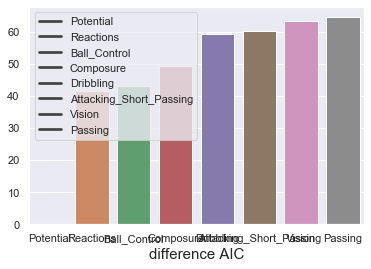

In [44]:
sns.set(font_scale=1)
sns.barplot(data=pd.DataFrame(lm_model_MF_MV_AIC_DataFrame.iloc[0].sort_values()[:8] - 
             lm_model_MF_MV_AIC_DataFrame.iloc[0].sort_values()[0]).T)
plt.xlabel("difference AIC",fontsize=15)
plt.legend(lm_model_MF_MV_AIC_DataFrame.iloc[0].sort_values()[:8].index)

### 3-3-2 여러개의 요인(독립변수)을 이용해 Market_Value을 잘 예측하는 모델 찾기.(단일변수를 사용한 모델에서 AIC가 작은 순서대로 변수를 추가하여 판단)

In [45]:
lm_model_MF_MV_2variable = smf.ols("Market_Value ~ Potential+Reactions", data2_MF).fit()
lm_model_MF_MV_2variable_aic=lm_model_MF_MV_2variable.aic.round(3)

lm_model_MF_MV_3variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control", data2_MF).fit()
lm_model_MF_MV_3variable_aic=lm_model_MF_MV_3variable.aic.round(3)


lm_model_MF_MV_4variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Composure", data2_MF).fit()
lm_model_MF_MV_4variable_aic=lm_model_MF_MV_4variable.aic.round(3)

lm_model_MF_MV_5variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Composure + Dribbling", data2_MF).fit()
lm_model_MF_MV_5variable_aic=lm_model_MF_MV_5variable.aic.round(3)

lm_model_MF_MV_6variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Composure + Dribbling+Attacking_Short_Passing"
                                   , data2_MF).fit()
lm_model_MF_MV_6variable_aic=lm_model_MF_MV_6variable.aic.round(3)

lm_model_MF_MV_7variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Composure + Dribbling+Attacking_Short_Passing+Vision"
                                   , data2_MF).fit()
lm_model_MF_MV_7variable_aic=lm_model_MF_MV_7variable.aic.round(3)


lm_model_MF_MV_8variable = smf.ols("Market_Value ~ Potential+Reactions+Ball_Control+Composure + Dribbling+Attacking_Short_Passing+Vision+Passing"
                                   , data2_MF).fit()
lm_model_MF_MV_8variable_aic=lm_model_MF_MV_8variable.aic.round(3)

#### 여거개의 요인으로 만든 모델의 AIC값의 차이 그래프

In [46]:
lm_model_MF_MV_variable_AIC_list=[lm_model_MF_MV_2variable_aic,lm_model_MF_MV_3variable_aic,
                                  lm_model_MF_MV_4variable_aic,lm_model_MF_MV_5variable_aic,
                                 lm_model_MF_MV_6variable_aic,lm_model_MF_MV_7variable_aic,
                                 lm_model_MF_MV_8variable_aic]

lm_model_MF_MV_variable_AIC_DataFrame=pd.DataFrame([lm_model_MF_MV_variable_AIC_list],
                                                   columns=['2variable','3variable','4variable','5variable',
                                                           '6variable','7variable','8variable'])
lm_model_MF_MV_variable_AIC_DataFrame.T

,0
2variable,5012.356
3variable,5013.642
4variable,5015.554
5variable,5017.430
6variable,5014.147
7variable,5015.799
8variable,5017.389


Text(0.5, 0, 'difference variable AIC')

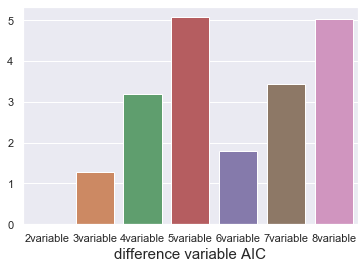

In [47]:
sns.set(font_scale=1)
sns.barplot(data=(lm_model_MF_MV_variable_AIC_DataFrame.T-
            lm_model_MF_MV_variable_AIC_DataFrame['2variable'][0]).T)
plt.xlabel("difference variable AIC",fontsize=15)

#### 여기서도 마찬가지고 5변수에서 6변수로 갈 때 AIC값이 낮아지는걸 파악하여 6번째로 추가된 변수인 Attacking_Short_Passing를 가장 AIC가 낮은 2변수 모델에 추가해봤다.

In [48]:
# 기존에 좋은 모델에서 새로운 변수를 추가한 모델
lm_model_MF_MV_new_3variable = smf.ols("Market_Value ~ Potential+Reactions+Attacking_Short_Passing", data2_MF).fit()
lm_model_MF_MV_new_3variable_aic=lm_model_MF_MV_new_3variable.aic.round(3)
lm_model_MF_MV_new_3variable_aic

5013.538

In [49]:
# 이게 기존에 가장 좋은 모델의 AIC
lm_model_MF_MV_2variable.aic

5012.35610084334

#### 그렇지만 MF에서는 FW에서와 달리 Attacking_Short_Passing를 추가하니 오히려 더 안좋은 모델이 되었다. 그래서 기존에 Potential+Reactions만을 변수로 가지는 모델이 성능이 가장 좋다.

In [50]:
five_variable2=['Potential','Reactions','Ball_Control','Composure','Dribbling','Attacking_Short_Passing']
data2_MF.corr()[five_variable2].T[five_variable2]['Attacking_Short_Passing']

Potential                  0.549263
Reactions                  0.730649
Ball_Control               0.838769
Composure                  0.842111
Dribbling                  0.695537
Attacking_Short_Passing    1.000000
Name: Attacking_Short_Passing, dtype: float64

#### FW에서보다는 다른 변수와의 상관관계가 높아서 변수를 추가하니 AIC가 오히려 올라간 거 같다.(Potential과 Reactions와의 상관관계는 조금 낮지만 Ball_Control과 Composure과의 상관관계는 높아서 변수를 추가해도 AIC가 내려가지 않음.)

### 3-3-3 모델을 이용한 Market_Value의 예측값에 대한 관찰

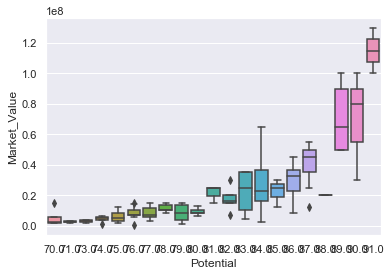

In [51]:
# Potential과 Market_Value와의 분포
data2_MF['Market_Value_predict']=lm_model_MF_MV_2variable.predict()
sns.boxplot(x="Potential", y="Market_Value", data=data2_MF)

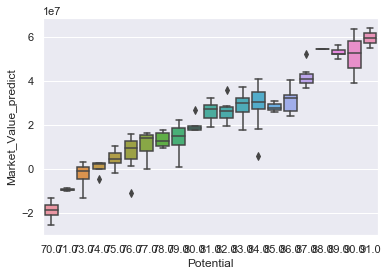

In [52]:
# Potential과 예측한 Market_Value와의 분포# 
sns.boxplot(x="Potential", y="Market_Value_predict", data=data2_MF)

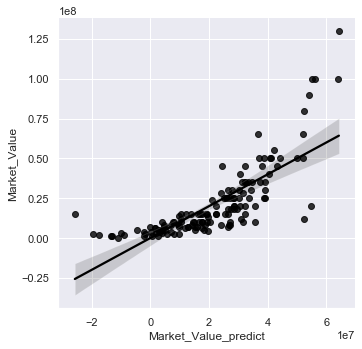

In [53]:
# Maket_Value값과 예측한 사이의 관계를 보여주는 그래프
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_MF,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

###### FW에서와 마찬가지로 Market_Value가 급격히 높아지는 값을 잘 예측하지 못하고 음수의 값을 예측하고 있다.(몸값에는 음수가 없는데 말이다.) 또한 그 분포가 지수함수의 형태를 보인다.

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


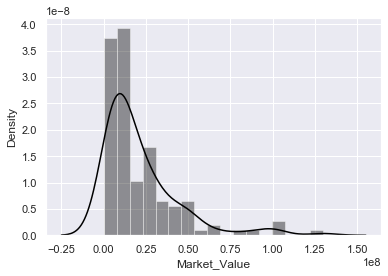

In [54]:
sns.distplot(data2_MF['Market_Value'], color = 'black')

###### Market_Value가 작은 곳에 많은 데이터가 몰려있다.
###### 그래서 예측을 더 잘할거 같은 푸아송 회귀 모델을 적용시킴

## 3-4 MF(미드필더) Market_Value 푸아송회귀모델

In [55]:
# 푸아송 회귀 모델
lm_model_MF_MV_2variable_pois = smf.glm("Market_Value ~ Potential+Reactions", data2_MF,
                                        family=sm.families.Poisson()).fit()
lm_model_MF_MV_2variable_pois_aic=lm_model_MF_MV_2variable_pois.aic.round(3)
lm_model_MF_MV_2variable_pois_aic

538722084.458

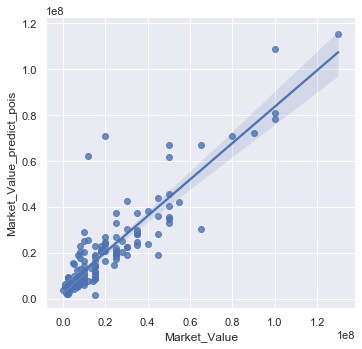

In [56]:
#푸아송 모델로 예측한 예측값의 분포
data2_MF['Market_Value_predict_pois']=lm_model_MF_MV_2variable_pois.predict()
sns.lmplot(x='Market_Value',y='Market_Value_predict_pois',data=data2_MF)

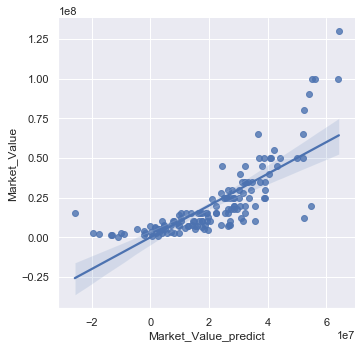

In [57]:
#선형모델로 예측한 예측값의 분포
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_MF)

###### 확실히 그래프상으로 푸아송분포를 이요한 모델이 예측이 더 잘되었다.

In [58]:
# 선형모델과 푸아송모델의 잔차제곱의 합
data2_MF['Market_Value_predict_pois_resid']=data2_MF['Market_Value']-data2_MF['Market_Value_predict_pois']
np.sum(lm_model_MF_MV_2variable.resid**2)
np.sum(data2_MF['Market_Value_predict_pois_resid']**2)
print('선형모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(lm_model_MF_MV_2variable.resid**2))
print('푸아송 모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(data2_MF['Market_Value_predict_pois_resid']**2))

선형모델을 이용한 잔차제곱합 : 2.778997643770676e+16
푸아송 모델을 이용한 잔차제곱합 : 1.4792308468738062e+16


###### 푸아송 모델을 이용한 것이 잔차가 더 작다.

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


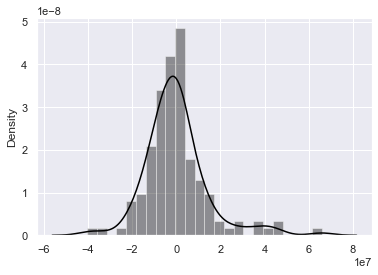

In [59]:
# 선형모델의 잔차
sns.distplot(lm_model_MF_MV_2variable.resid, color = 'black')

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


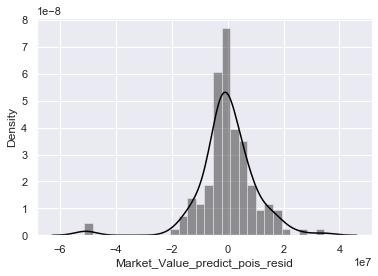

In [60]:
# 푸아송 모델의 잔차
sns.distplot(data2_MF['Market_Value_predict_pois_resid'], color = 'black')

###### 선형모델보다 푸아송 모델을 이용한 것의 잔차가 더 정규분포에 가깝다.

---

###### 수비수에서도 앞서 진행한 FW와 MF와 같은 방법으로 분석이 진행되어 자세한 설명은 생략함.

## 3-5 DF(수비수) Market_Value 선형예측모델

In [61]:
# 단일요인(독립변수를 이용한 모델의 AIC값 찾기)
lm_model_DF_MV_1 = smf.ols(formula = 'Market_Value ~ Age' ,data=data2_DF).fit()
lm_model_DF_MV_2 = smf.ols(formula = 'Market_Value ~ Potential' ,data=data2_DF).fit()
lm_model_DF_MV_3 = smf.ols(formula = 'Market_Value ~ SkillMoves' ,data=data2_DF).fit()
lm_model_DF_MV_4 = smf.ols(formula = 'Market_Value ~ Pace' ,data=data2_DF).fit()
lm_model_DF_MV_5 = smf.ols(formula = 'Market_Value ~ Shooting' ,data=data2_DF).fit()
lm_model_DF_MV_6 = smf.ols(formula = 'Market_Value ~ Passing' ,data=data2_DF).fit()
lm_model_DF_MV_7 = smf.ols(formula = 'Market_Value ~ Dribbling' ,data=data2_DF).fit()
lm_model_DF_MV_8 = smf.ols(formula = 'Market_Value ~ Defending' ,data=data2_DF).fit()
lm_model_DF_MV_9 = smf.ols(formula = 'Market_Value ~ Physical' ,data=data2_DF).fit()
lm_model_DF_MV_10 = smf.ols(formula = 'Market_Value ~ Attacking_Crossing' ,data=data2_DF).fit()

lm_model_DF_MV_11 = smf.ols(formula = 'Market_Value ~ Attacking_Finishing' ,data=data2_DF).fit()
lm_model_DF_MV_12 = smf.ols(formula = 'Market_Value ~ Attacking_Heading_Accuracy' ,data=data2_DF).fit()
lm_model_DF_MV_13 = smf.ols(formula = 'Market_Value ~ Attacking_Short_Passing' ,data=data2_DF).fit()
lm_model_DF_MV_14 = smf.ols(formula = 'Market_Value ~ Attacking_Volleys' ,data=data2_DF).fit()
lm_model_DF_MV_15 = smf.ols(formula = 'Market_Value ~ _Dribbling' ,data=data2_DF).fit()
lm_model_DF_MV_16 = smf.ols(formula = 'Market_Value ~ Curve' ,data=data2_DF).fit()
lm_model_DF_MV_17 = smf.ols(formula = 'Market_Value ~ Long_Passing' ,data=data2_DF).fit()
lm_model_DF_MV_18 = smf.ols(formula = 'Market_Value ~ Ball_Control' ,data=data2_DF).fit()
lm_model_DF_MV_19 = smf.ols(formula = 'Market_Value ~ Acceleration' ,data=data2_DF).fit()
lm_model_DF_MV_20 = smf.ols(formula = 'Market_Value ~ Sprint_Speed' ,data=data2_DF).fit()

lm_model_DF_MV_21 = smf.ols(formula = 'Market_Value ~ Agility' ,data=data2_DF).fit()
lm_model_DF_MV_22 = smf.ols(formula = 'Market_Value ~ Reactions' ,data=data2_DF).fit()
lm_model_DF_MV_23 = smf.ols(formula = 'Market_Value ~ Balance' ,data=data2_DF).fit()
lm_model_DF_MV_24 = smf.ols(formula = 'Market_Value ~ Shot_Power' ,data=data2_DF).fit()
lm_model_DF_MV_25 = smf.ols(formula = 'Market_Value ~ Jumping' ,data=data2_DF).fit()
lm_model_DF_MV_26 = smf.ols(formula = 'Market_Value ~ Stamina' ,data=data2_DF).fit()
lm_model_DF_MV_27 = smf.ols(formula = 'Market_Value ~ Strength' ,data=data2_DF).fit()
lm_model_DF_MV_28 = smf.ols(formula = 'Market_Value ~ Long_Shots' ,data=data2_DF).fit()
lm_model_DF_MV_29 = smf.ols(formula = 'Market_Value ~ Aggression' ,data=data2_DF).fit()
lm_model_DF_MV_30 = smf.ols(formula = 'Market_Value ~ Interceptions' ,data=data2_DF).fit()

lm_model_DF_MV_31 = smf.ols(formula = 'Market_Value ~ Positioning' ,data=data2_DF).fit()
lm_model_DF_MV_32 = smf.ols(formula = 'Market_Value ~ Vision' ,data=data2_DF).fit()
lm_model_DF_MV_33 = smf.ols(formula = 'Market_Value ~ Composure' ,data=data2_DF).fit()
lm_model_DF_MV_34 = smf.ols(formula = 'Market_Value ~ Marking' ,data=data2_DF).fit()
lm_model_DF_MV_35 = smf.ols(formula = 'Market_Value ~ Standing_Tackle' ,data=data2_DF).fit()
lm_model_DF_MV_36 = smf.ols(formula = 'Market_Value ~ Sliding_Tackle' ,data=data2_DF).fit()

In [62]:
lm_model_DF_MV_AIC_list=[]

lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_1.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_2.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_3.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_4.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_5.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_6.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_7.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_8.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_9.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_10.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_11.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_12.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_13.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_14.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_15.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_16.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_17.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_18.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_19.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_20.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_21.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_22.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_23.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_24.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_25.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_26.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_27.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_28.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_29.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_30.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_31.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_32.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_33.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_34.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_35.aic.round(3))
lm_model_DF_MV_AIC_list.append(lm_model_DF_MV_36.aic.round(3))

lm_model_DF_MV_AIC_DataFrame=pd.DataFrame([lm_model_DF_MV_AIC_list],columns=list(data2_DF.columns[1:37]))

###### 'Potential' - 'Reactions' - 'Standing_Tackle' - 'Defending' - 'Marking' - 'Composure' - 'Interceptions' - 'Attacking_Short_Passing' 순으로 AIC가 낮다.

#### -AIC가 낮은 하위 8개를 가장 낮은 AIC와의 차이를 그래프로 표현

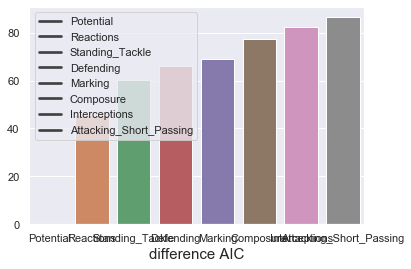

In [63]:
sns.set(font_scale=1)
sns.barplot(data=pd.DataFrame(lm_model_DF_MV_AIC_DataFrame.iloc[0].sort_values()[:8] - 
             lm_model_DF_MV_AIC_DataFrame.iloc[0].sort_values()[0]).T)
plt.xlabel("difference AIC",fontsize=15)
plt.legend(lm_model_DF_MV_AIC_DataFrame.iloc[0].sort_values()[:8].index)

In [64]:
#여러개의 요인 (독립변수)을 이용해 예측하는 모델 찾기.(AIC순서로 변수 추가)
lm_model_DF_MV_2variable = smf.ols("Market_Value ~ Potential+Reactions", data2_DF).fit()
lm_model_DF_MV_2variable_aic=lm_model_DF_MV_2variable.aic.round(3)

lm_model_DF_MV_3variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle", data2_DF).fit()
lm_model_DF_MV_3variable_aic=lm_model_DF_MV_3variable.aic.round(3)

lm_model_DF_MV_4variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle+Defending", data2_DF).fit()
lm_model_DF_MV_4variable_aic=lm_model_DF_MV_4variable.aic.round(3)

lm_model_DF_MV_5variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle+Defending+ Marking", data2_DF).fit()
lm_model_DF_MV_5variable_aic=lm_model_DF_MV_5variable.aic.round(3)

lm_model_DF_MV_6variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle+Defending+ Marking+Composure"
                                   , data2_DF).fit()
lm_model_DF_MV_6variable_aic=lm_model_DF_MV_6variable.aic.round(3)

lm_model_DF_MV_7variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle+Defending+ Marking+Composure+Interceptions"
                                   , data2_DF).fit()
lm_model_DF_MV_7variable_aic=lm_model_DF_MV_7variable.aic.round(3)


lm_model_DF_MV_8variable = smf.ols("Market_Value ~ Potential+Reactions+Standing_Tackle+Defending+ Marking+Composure+Interceptions+Attacking_Short_Passing"
                                   , data2_DF).fit()
lm_model_DF_MV_8variable_aic=lm_model_DF_MV_8variable.aic.round(3)

In [65]:
lm_model_DF_MV_variable_AIC_list=[lm_model_DF_MV_2variable_aic,lm_model_DF_MV_3variable_aic,
                                  lm_model_DF_MV_4variable_aic,lm_model_DF_MV_5variable_aic,
                                 lm_model_DF_MV_6variable_aic,lm_model_DF_MV_7variable_aic,
                                 lm_model_DF_MV_8variable_aic]

lm_model_DF_MV_variable_AIC_DataFrame=pd.DataFrame([lm_model_DF_MV_variable_AIC_list],
                                                   columns=['2variable','3variable','4variable','5variable',
                                                           '6variable','7variable','8variable'])
lm_model_DF_MV_variable_AIC_DataFrame.T

,0
2variable,6243.245
3variable,6241.786
4variable,6243.638
5variable,6243.793
6variable,6245.467
7variable,6246.548
8variable,6247.640


DF에서는 FW와 MF와 달리 AIC그래프가 정상적이다.

Text(0.5, 0, 'difference variable AIC')

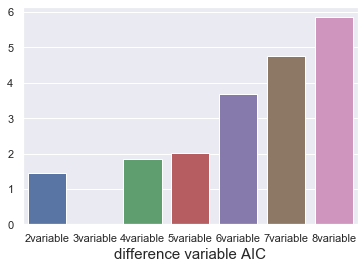

In [66]:
sns.set(font_scale=1)
sns.barplot(data=(lm_model_DF_MV_variable_AIC_DataFrame.T-
            lm_model_DF_MV_variable_AIC_DataFrame['3variable'][0]).T)
plt.xlabel("difference variable AIC",fontsize=15)

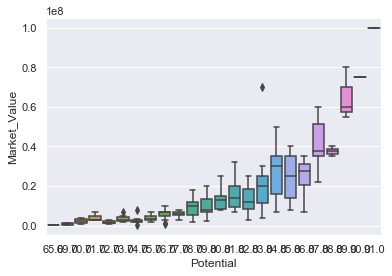

In [67]:
# Potential과 Market_Value과의 관계
data2_DF['Market_Value_predict']=lm_model_DF_MV_3variable.predict()
sns.boxplot(x="Potential", y="Market_Value", data=data2_DF)

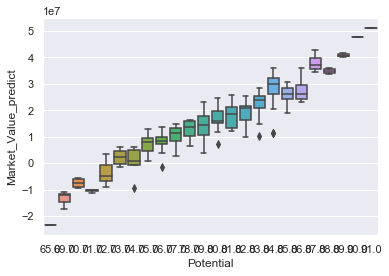

In [68]:
# Potential과 Market_Value_predict과의 관계
sns.boxplot(x="Potential", y="Market_Value_predict", data=data2_DF)

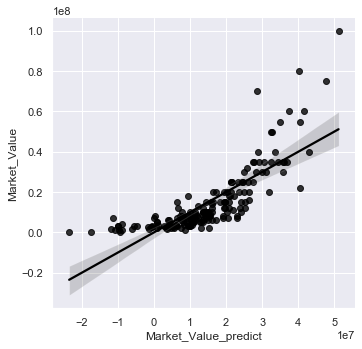

In [69]:
# Market_Value와 Market_Value_predict 사이의 관계 
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_DF,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


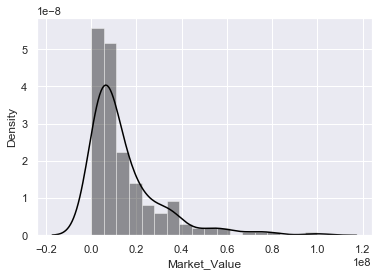

In [70]:
# Market_Value의 분포
sns.distplot(data2_DF['Market_Value'], color = 'black')

## 3-6 DF(수비수) Market_Value 푸아송회귀모델

In [71]:
lm_model_DF_MV_3variable_pois = smf.glm("Market_Value ~ Potential+Reactions+Standing_Tackle", data2_DF,
                                        family=sm.families.Poisson()).fit()
lm_model_DF_MV_3variable_pois_aic=lm_model_DF_MV_3variable_pois.aic.round(3)
lm_model_DF_MV_3variable_pois_aic

413165070.001

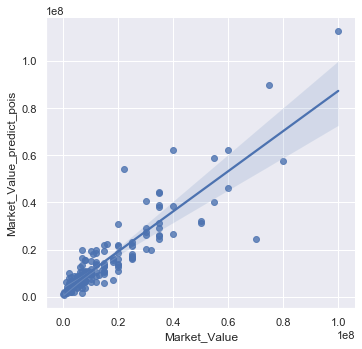

In [72]:
#푸아송 모델로 예측한 예측값의 분포
data2_DF['Market_Value_predict_pois']=lm_model_DF_MV_3variable_pois.predict()
sns.lmplot(x='Market_Value',y='Market_Value_predict_pois',data=data2_DF)

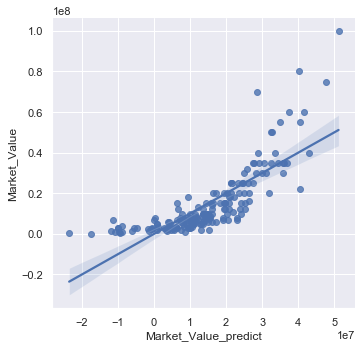

In [73]:
sns.lmplot(x = "Market_Value_predict", y = "Market_Value", data = data2_DF)

In [74]:
# 선형모델과 푸아송모델의 잔차제곱의 합
data2_DF['Market_Value_predict_pois_resid']=data2_DF['Market_Value']-data2_DF['Market_Value_predict_pois']
np.sum(lm_model_DF_MV_3variable.resid**2)
np.sum(data2_DF['Market_Value_predict_pois_resid']**2)
print('선형모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(lm_model_DF_MV_3variable.resid**2))
print('푸아송 모델을 이용한 잔차제곱합 :',end=' ')
print(np.sum(data2_DF['Market_Value_predict_pois_resid']**2))

선형모델을 이용한 잔차제곱합 : 1.6884564106575584e+16
푸아송 모델을 이용한 잔차제곱합 : 9169116659413364.0


C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


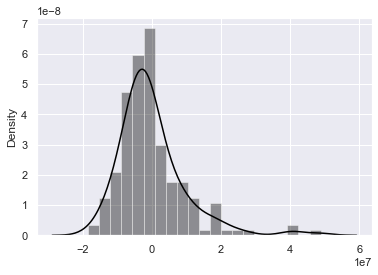

In [75]:
# 선형모델의 잔차
sns.distplot(lm_model_DF_MV_3variable.resid, color = 'black')

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


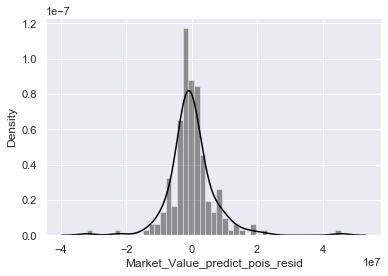

In [76]:
# 푸아송 모델의 잔차
sns.distplot(data2_DF['Market_Value_predict_pois_resid'], color = 'black')

### FW,MF와 마찬가지로 푸아송 모델이 더 예측을 잘해준다.

# 결론

### 1. FW(공격수)의 가치를 예측하는 효율적인 모델에 사용되는 변수는
###  Potential, Reactions, Ball_Control, Dribbling, Stamina
### 2. MF(미드필더)의 가치를 예측하는 효율적인 모델에 사용되는 변수는
### Potential, Reactions
### 3. DF(수비수)의 가치를 예측한는 효율적인 모델에 사용되는 변수는
###  Potential, Reactions, Standing_Tackle
### 4. 포지션별로 적용된 모델에서 사용되는 변수에 차이는 분명히 있다.
### 5. 그러나 Potetial, Reactions는 선수의 가치를 판단하는데 공통으로 필수적인 요인임을 알 수 있다.


# 알게된 점

### 1. 단일변수로 만든 모델의 AIC의 기준이 다변수 모델을 만들 때 일반적으로는 적용되지만, 절대적인 기준이 될 수 없다는 점을 알게 되었다. 그 이유는 변수들 간의 상관관계를 고려하지 않고 AIC만을 기준으로 삼았기 때문.(FW(공격수)를 예측할 때)

Text(0.5, 0, 'difference variable AIC_FW')

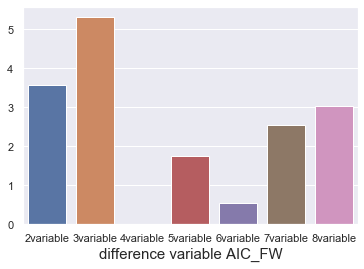

In [77]:
sns.set(font_scale=1)
sns.barplot(data=(lm_model_FW_MV_variable_AIC_DataFrame.T-
            lm_model_FW_MV_variable_AIC_DataFrame['4variable'][0]).T)
plt.xlabel("difference variable AIC_FW",fontsize=15)

### 2. 데이터의 분포가 지수함수의 형태를 보이면 푸아송 회귀모델을 사용하는 것이 모델 예측에 더 용이하다.